In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.set_printoptions(suppress=True)

2024-03-26 11:37:36.463134: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 11:37:36.463220: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 11:37:36.463254: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-26 11:37:36.471549: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the dataset and set-up the labels

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
## Plot a random image

/tmp/ipykernel_261/502236697.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title((labels[int(label)]))


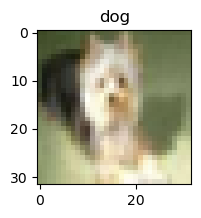

In [4]:
i=182
label = y_train[i]
image = x_train[i]
plt.figure(figsize=(2,2))
plt.grid(False)
plt.title((labels[int(label)]))
plt.imshow(image)
plt.show()

## Normalise and reshape the input data

In [5]:
y_input = tf.keras.utils.to_categorical(y_train)
x_input = (np.reshape(x_train, (x_train.shape[0], 3072)) / 255.0).astype(np.float32)

## Create the 2-layer neural network

In [6]:
layer1 = tf.keras.layers.Dense(units=512, activation=tf.nn.relu)
layer2 = tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
def predict(x):
    # input Layer
    middle_layer = layer1(x)

    # logits Layer
    output_layer = layer2(middle_layer)
    return output_layer

## Define the loss function as the cross-entropy loss

In [7]:
@tf.function
def loss(x,y):
    y_ = predict(x)
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_), axis=[1]))
    return cross_entropy

## Create the training routines

In [8]:
lr = 0.001
train_steps = 2500
# we'll use the Adam optimizer instead of gradient descent.
optimizer = tf.optimizers.Adam(lr)

2024-03-26 11:37:51.572407: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14604 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0


## Now we run the training

In [9]:
for i in range(train_steps):
    with tf.GradientTape() as tape:
        current_loss = loss(x_input,y_input)
        gradients = tape.gradient(current_loss, tape.watched_variables())
        optimizer.apply_gradients(zip(gradients, tape.watched_variables()))
        if i%100 == 0:
            print('Training Step:' + str(i) + ' Loss = ' + str(current_loss))


2024-03-26 11:37:52.931564: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-26 11:37:53.361731: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5628a5b483a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-26 11:37:53.361778: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-16GB, Compute Capability 7.0
2024-03-26 11:37:53.366785: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-26 11:37:53.518243: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-03-26 11:37:53.626732: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Training Step:0 Loss = tf.Tensor(2.5227065, shape=(), dtype=float32)
Training Step:100 Loss = tf.Tensor(1.7816116, shape=(), dtype=float32)
Training Step:200 Loss = tf.Tensor(1.6430721, shape=(), dtype=float32)
Training Step:300 Loss = tf.Tensor(1.5568709, shape=(), dtype=float32)
Training Step:400 Loss = tf.Tensor(1.4883416, shape=(), dtype=float32)
Training Step:500 Loss = tf.Tensor(1.4385184, shape=(), dtype=float32)
Training Step:600 Loss = tf.Tensor(1.3914446, shape=(), dtype=float32)
Training Step:700 Loss = tf.Tensor(1.3550853, shape=(), dtype=float32)
Training Step:800 Loss = tf.Tensor(1.3120694, shape=(), dtype=float32)
Training Step:900 Loss = tf.Tensor(1.2831196, shape=(), dtype=float32)
Training Step:1000 Loss = tf.Tensor(1.2433516, shape=(), dtype=float32)
Training Step:1100 Loss = tf.Tensor(1.2202003, shape=(), dtype=float32)
Training Step:1200 Loss = tf.Tensor(1.1975833, shape=(), dtype=float32)
Training Step:1300 Loss = tf.Tensor(1.1751784, shape=(), dtype=float32)
Trai

## Print out the accuracy on the training data

In [10]:
y_prob = predict(x_input).numpy()

print(y_prob.shape)
y_pred = np.argmax(y_prob,axis=-1)
print('train accuracy: ', np.sum(y_pred==y_train[:,0])/len(y_train))

(50000, 10)
train accuracy:  0.66616


## Test on the test data

In [11]:

## shallow should be around 0.4 accuracy
x_test_input = (np.reshape(x_test, (x_test.shape[0], 3072)) / 255.0).astype(np.float32)

y_prob = predict(x_test_input).numpy()

print(y_prob.shape)
y_pred = np.argmax(y_prob,axis=-1)
print('test accuracy: ', np.sum(y_pred==y_test[:,0])/len(y_test))

(10000, 10)
test accuracy:  0.5109


## Plot a few images with their classification

/tmp/ipykernel_261/459179036.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('True: %s, Predicted: %s (%d%% certainty)' % (labels[int(label)],labels[y_prob[i].argmax()],100*y_prob[i,y_prob[i].argmax()]))


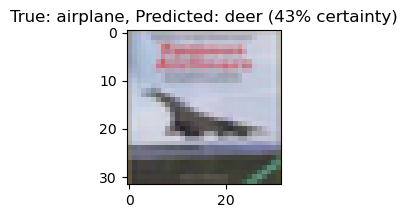

In [12]:
i=3

label = y_test[i]
image = x_test[i]
plt.figure(figsize=(2,2))
plt.grid(False)
plt.title('True: %s, Predicted: %s (%d%% certainty)' % (labels[int(label)],labels[y_prob[i].argmax()],100*y_prob[i,y_prob[i].argmax()]))
plt.imshow(image)
plt.show()